In [227]:
! pip install torch

Defaulting to user installation because normal site-packages is not writeable


In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [231]:
df = pd.read_csv("heart.csv")

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [33]:
df.sample()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


<Figure size 500x1200 with 0 Axes>

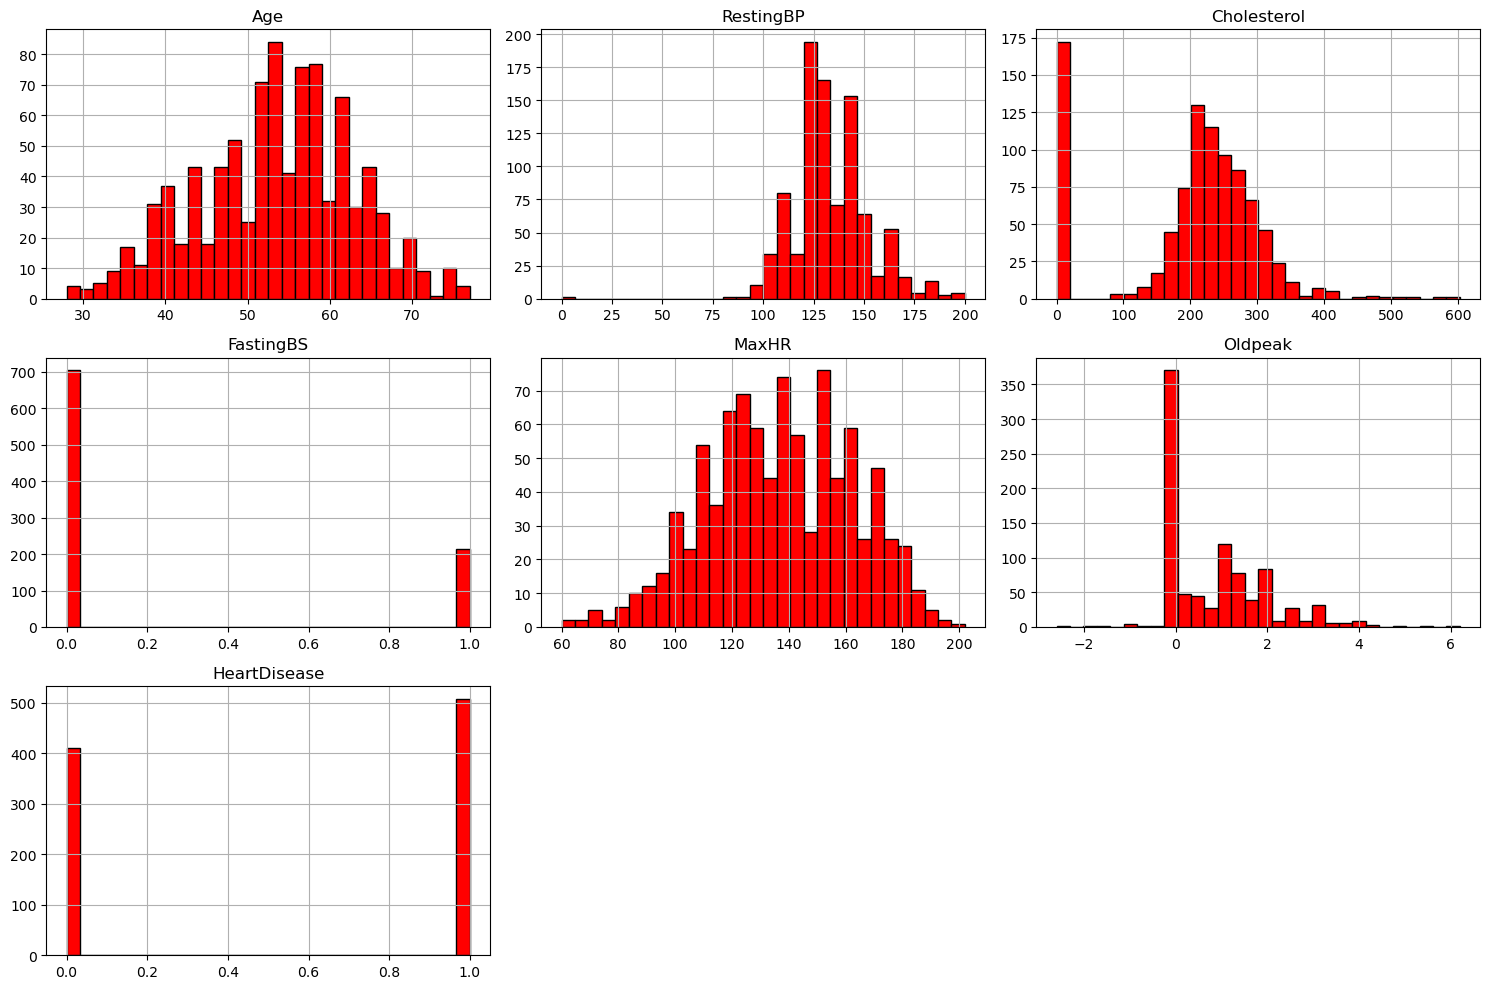

In [309]:
## feature distribution to check for otliers and skewness
# explore feature distributions
heart_failure_features = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak", "HeartDisease"]

plt.figure(figsize=(5, 12))
heart_failure_features = [col for col in heart_failure_features if col in df.columns]

df[heart_failure_features].hist(bins=30, figsize=(15, 10), layout=(3, 3), color="red", edgecolor="black")
plt.tight_layout()
plt.show()


In [ ]:
## Correlation

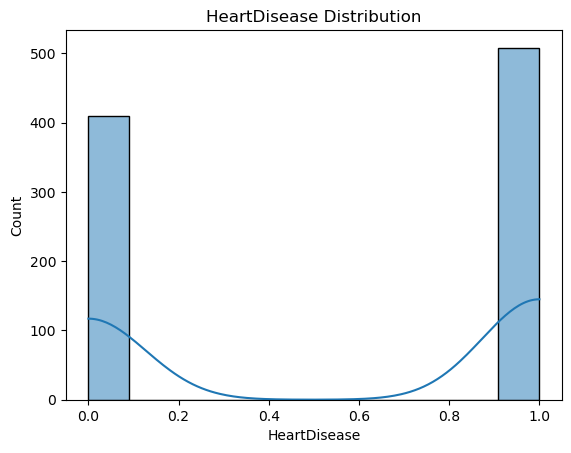

In [35]:
## Seaborn

sns.histplot(df['HeartDisease'], kde=True)
plt.title("HeartDisease Distribution")
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.show()


In [147]:
df["Sex"].ndim

1

In [235]:
enc = OneHotEncoder(handle_unknown ="ignore")

Sex = np.array(df["Sex"]).reshape(-1,1)
enc.fit(Sex)

OneHotEncoder(handle_unknown='ignore')

In [239]:
enc.transform(Sex).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [243]:
pd.get_dummies(df["Sex"])

,F,M
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
913,False,True
914,False,True
915,False,True
916,True,False


In [245]:
encoded_features = pd.get_dummies(df[["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"]],dtype ="int32")
encoded_features                                 

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [247]:
encoded_features

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [249]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [251]:
df = df.drop(columns= ["Sex", "ChestPainType","RestingECG","ExerciseAngina","ST_Slope"])
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [253]:
merge_df = pd.concat([df,encoded_features],axis =1)

In [255]:
## Split into dependent and independent

features = merge_df.drop(columns =["HeartDisease"])
label = merge_df["HeartDisease"]

In [257]:
## train_test split 
X_train,X_test, y_train,y_test = train_test_split(features,label, test_size= 0.20,random_state =42)

In [259]:
## Feature Scaling
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [261]:
# convert the dataframe to  tensor
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

y_train= torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [263]:
X_train[0:10] , y_train[0:10]

(tensor([[ 42.0000, 120.0000, 240.0000,   1.0000, 194.0000,   0.8000,   0.0000,
            1.0000,   0.0000,   0.0000,   1.0000,   0.0000,   0.0000,   1.0000,
            0.0000,   1.0000,   0.0000,   1.0000,   0.0000,   0.0000],
         [ 36.0000, 130.0000, 209.0000,   0.0000, 178.0000,   0.0000,   0.0000,
            1.0000,   0.0000,   0.0000,   1.0000,   0.0000,   0.0000,   1.0000,
            0.0000,   1.0000,   0.0000,   0.0000,   0.0000,   1.0000],
         [ 56.0000, 150.0000, 213.0000,   1.0000, 125.0000,   1.0000,   0.0000,
            1.0000,   1.0000,   0.0000,   0.0000,   0.0000,   0.0000,   1.0000,
            0.0000,   0.0000,   1.0000,   0.0000,   1.0000,   0.0000],
         [ 37.0000, 130.0000, 211.0000,   0.0000, 142.0000,   0.0000,   1.0000,
            0.0000,   0.0000,   0.0000,   1.0000,   0.0000,   0.0000,   1.0000,
            0.0000,   1.0000,   0.0000,   0.0000,   0.0000,   1.0000],
         [ 51.0000, 120.0000,   0.0000,   1.0000, 104.0000,   0.0000,   0.00

In [265]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([734, 20]),
 torch.Size([184, 20]),
 torch.Size([734]),
 torch.Size([184]))

In [195]:
X_train

tensor([[ 42., 120., 240.,  ...,   1.,   0.,   0.],
        [ 36., 130., 209.,  ...,   0.,   0.,   1.],
        [ 56., 150., 213.,  ...,   0.,   1.,   0.],
        ...,
        [ 60., 130., 253.,  ...,   0.,   0.,   1.],
        [ 60., 152.,   0.,  ...,   0.,   0.,   1.],
        [ 40., 150., 392.,  ...,   0.,   1.,   0.]])

In [197]:
X_test

tensor([[ 63., 140., 195.,  ...,   0.,   0.,   1.],
        [ 53., 145., 518.,  ...,   0.,   1.,   0.],
        [ 65., 160.,   0.,  ...,   0.,   1.,   0.],
        ...,
        [ 64., 141., 244.,  ...,   0.,   1.,   0.],
        [ 49., 130., 266.,  ...,   0.,   0.,   1.],
        [ 64., 144.,   0.,  ...,   0.,   1.,   0.]])

In [99]:
y_train

tensor([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,

In [199]:
y_test

tensor([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [271]:
# create a neural network
class HeartFailureANN(nn.Module):
    def __init__(self, input_size):
        super(HeartFailureANN, self). __init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, 20),
            nn.ReLU(),
            nn.Linear(20, 1),
            nn.Sigmoid()
            
        )
    def forward(self, x):
        return self.model(x)

In [275]:
torch.manual_seed(42)
model = HeartFailureANN(20)

list(model.parameters())

[Parameter containing:
 tensor([[ 0.1710,  0.1856, -0.0524,  0.2054, -0.0490,  0.0451, -0.1089,  0.1313,
           0.1971, -0.1640,  0.1944,  0.0419,  0.1652,  0.0303,  0.1078, -0.0316,
           0.1724,  0.0331, -0.1044,  0.0570],
         [-0.1030, -0.0262, -0.0908,  0.1483, -0.1765, -0.1031, -0.0631, -0.1344,
           0.0211, -0.2209,  0.2019, -0.1899,  0.1726,  0.0372, -0.0726,  0.1382,
           0.0348,  0.1807,  0.0244, -0.0705],
         [ 0.0601, -0.0606,  0.0941,  0.1996,  0.1293, -0.0978,  0.1291,  0.0400,
           0.1136, -0.1363, -0.2214, -0.0864, -0.1715,  0.1835,  0.0644,  0.0926,
           0.0707, -0.0039,  0.1750, -0.1589],
         [ 0.0141, -0.1526,  0.0689, -0.0770,  0.0685, -0.0466,  0.1855, -0.1325,
          -0.1334, -0.1334,  0.2011,  0.0745,  0.2152, -0.1845, -0.2218, -0.1749,
          -0.1504,  0.0906,  0.0801,  0.1858],
         [-0.1155, -0.1524,  0.1186, -0.0904,  0.1357, -0.0531,  0.1279, -0.1737,
          -0.1128,  0.0682,  0.0473, -0.0570,  0.13

In [277]:
## Train the model
## create the loss function

loss_fn= nn.BCELoss()

##create the optimizer
optimizer =torch.optim.Adam(params=model.parameters(),lr=0.001)

In [279]:
import torch

torch.manual_seed(42)

# Number of epochs
epochs = 100

# Create empty lists to track loss values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # Training
    model.train()
    y_pred = model(X_train)

    # Ensure labels are float and shaped [N, 1]
    y_train_reshaped = y_train.view(-1, 1).float()

    train_loss = loss_fn(y_pred, y_train_reshaped)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Testing
    model.eval()
    with torch.inference_mode():
        y_pred = model(X_test)
        y_test_reshaped = y_test.view(-1, 1).float()
        test_loss = loss_fn(y_pred, y_test_reshaped)

    # Logging
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        train_loss_values.append(train_loss.item())
        test_loss_values.append(test_loss.item())
        print(f"Epoch: {epoch} | MAE Train Loss: {train_loss:.4f} | MAE Test Loss: {test_loss:.4f}")

Epoch: 0 | MAE Train Loss: 3.1486 | MAE Test Loss: 2.5375
Epoch: 10 | MAE Train Loss: 0.7293 | MAE Test Loss: 0.9216
Epoch: 20 | MAE Train Loss: 0.7110 | MAE Test Loss: 0.7516
Epoch: 30 | MAE Train Loss: 0.6345 | MAE Test Loss: 0.6376
Epoch: 40 | MAE Train Loss: 0.5856 | MAE Test Loss: 0.6365
Epoch: 50 | MAE Train Loss: 0.5592 | MAE Test Loss: 0.5803
Epoch: 60 | MAE Train Loss: 0.5396 | MAE Test Loss: 0.5847
Epoch: 70 | MAE Train Loss: 0.5239 | MAE Test Loss: 0.5637
Epoch: 80 | MAE Train Loss: 0.5125 | MAE Test Loss: 0.5602
Epoch: 90 | MAE Train Loss: 0.5040 | MAE Test Loss: 0.5559


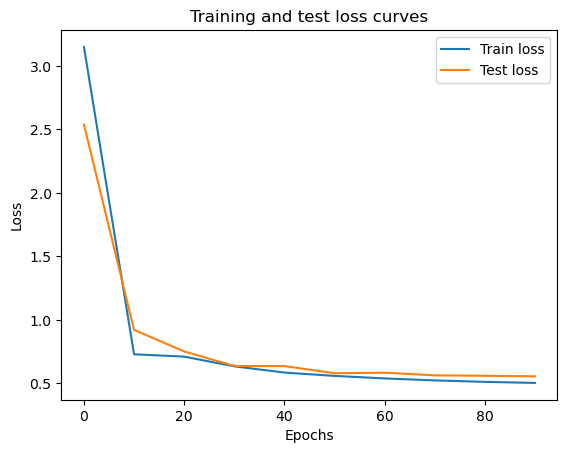

In [281]:
## plot the loss curves
plt.plot(epoch_count, train_loss_values, label ="Train loss")
plt.plot(epoch_count, test_loss_values, label ="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [297]:
## Prediction and Evaluate the model
## prediction using X_test

y_preds = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model.forward(data)  # individual prediction
        y_preds.append(y_pred.argmax().item())  # append all prediction

print(f"y_pred: {y_preds}")

y_pred: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [301]:
y_test

tensor([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1])